In [1]:
# mnist (benchmark) dataset

# It is a dataset of handwritten images

# http://yann.lecun.com/exdb/mnist/


# The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples,
# and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been
# size-normalized and centered in a fixed-size image.

# It is a good database for people who want to try learning techniques and pattern recognition methods on real-world
# data while spending minimal efforts on preprocessing and formatting.'''


In [2]:
!pip install keras

In [3]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


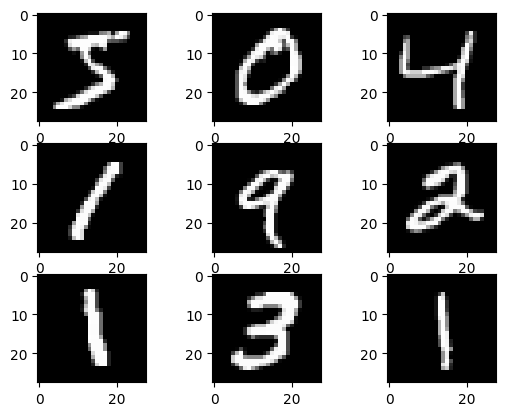

In [5]:
# Display the dataset
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [6]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
  #reshape dataset to have a single channel
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)
else:
  #reshape dataset to have a single channel
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

In [7]:
#convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Nor. 0 to 1
x_train /= 255
x_test /= 255

In [8]:
# convert class vectors to binary class matrices  OR one hot encode target values
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [9]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
# To prevent overfitting
layer4 = Dropout(0.5)(layer3)

layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [10]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=500)

Epoch 1/12
120/120 [==============================] - 14s 27ms/step - loss: 2.4915 - accuracy: 0.1098
Epoch 2/12
120/120 [==============================] - 4s 31ms/step - loss: 2.4737 - accuracy: 0.1111
Epoch 3/12
120/120 [==============================] - 4s 31ms/step - loss: 2.4556 - accuracy: 0.1125
Epoch 4/12
120/120 [==============================] - 3s 28ms/step - loss: 2.4379 - accuracy: 0.1144
Epoch 5/12
120/120 [==============================] - 3s 27ms/step - loss: 2.4207 - accuracy: 0.1161
Epoch 6/12
120/120 [==============================] - 3s 21ms/step - loss: 2.4043 - accuracy: 0.1184
Epoch 7/12
120/120 [==============================] - 3s 21ms/step - loss: 2.3883 - accuracy: 0.1189
Epoch 8/12
120/120 [==============================] - 2s 20ms/step - loss: 2.3726 - accuracy: 0.1208
Epoch 9/12
120/120 [==============================] - 2s 20ms/step - loss: 2.3577 - accuracy: 0.1238
Epoch 10/12
120/120 [==============================] - 2s 21ms/step - loss: 2.3434 - accur

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])


loss= 2.3058552742004395
accuracy= 0.11860000342130661


In [12]:
#sinle Value predication in number
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[2])))


313/313 [==============================] - 1s 2ms/step
0


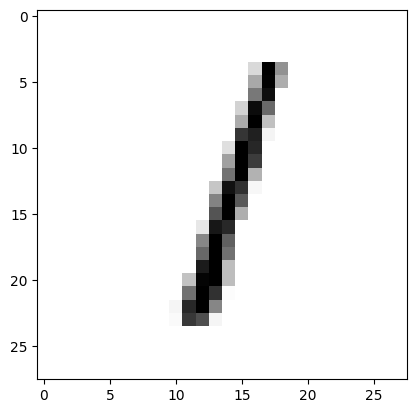

In [13]:
#sinle Value predication in graph (plot)
import matplotlib.pyplot as plt
plt.imshow(x_test[2].reshape(28, 28), cmap = plt.cm.binary)
plt.show()


In [ ]:
-------------End----------------

In [14]:
# Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.
# Each example is a 28x28 grayscale image, associated with a label from 10 classes.


'''Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot '''

# for further assistance https://www.kaggle.com/zalando-research/fashionmnist


'Labels\n\nEach training and test example is assigned to one of the following labels:\n\n0 T-shirt/top\n1 Trouser\n2 Pullover\n3 Dress\n4 Coat\n5 Sandal\n6 Shirt\n7 Sneaker\n8 Bag\n9 Ankle boot '

In [15]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


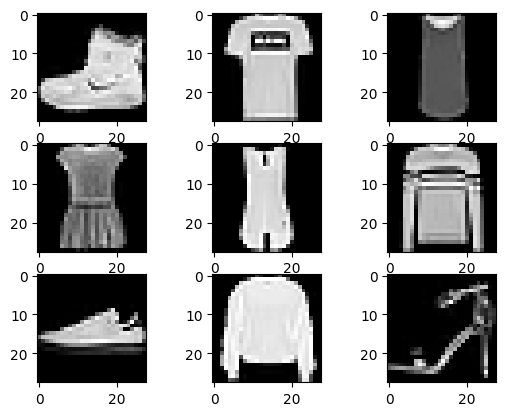

In [16]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [17]:
# reshape dataset to have a single channel
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

##convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

#Nor. 0 to 1
train_X = train_X / 255
test_X = test_X / 255

# convert to one hot encoder (vector)
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


In [18]:

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [19]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.4682 - accuracy: 0.8300
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3209 - accuracy: 0.8836
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2822 - accuracy: 0.8976
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2517 - accuracy: 0.9083
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.2322 - accuracy: 0.9143


In [20]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2776 - accuracy: 0.9024
Test loss 0.2775956094264984
Test accuracy 0.902400016784668


In [21]:
#sinle Value predication in number (category)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[1])))

313/313 [==============================] - 1s 2ms/step
2


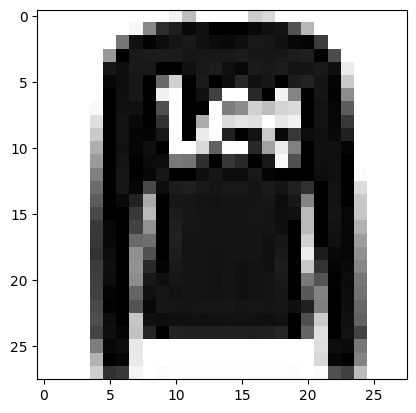

In [22]:
#sinle Value predication in graph (plot)
plt.imshow(test_X[1].reshape(28, 28), cmap = plt.cm.binary)
plt.show()